## Step 1: Importing Libraries and Loading Data


In [1]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For statistical visualization
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.preprocessing import LabelEncoder  # For encoding categorical labels
from sklearn.neighbors import KNeighborsClassifier  # Machine Learning Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For evaluation

# Load the dataset
df = pd.read_csv("IRIS.csv")

# Display the first 5 rows of the dataset
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Step 2: Exploring the Dataset


In [2]:
# Display dataset information (columns, non-null values, data types)
df.info()

# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Display summary statistics of numerical columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Missing Values in Each Column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Step 3: Visualizing the Data


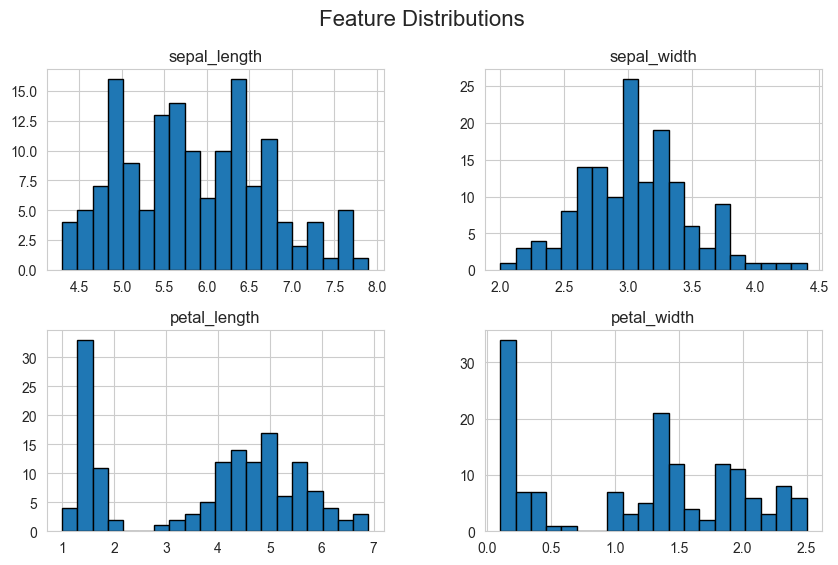

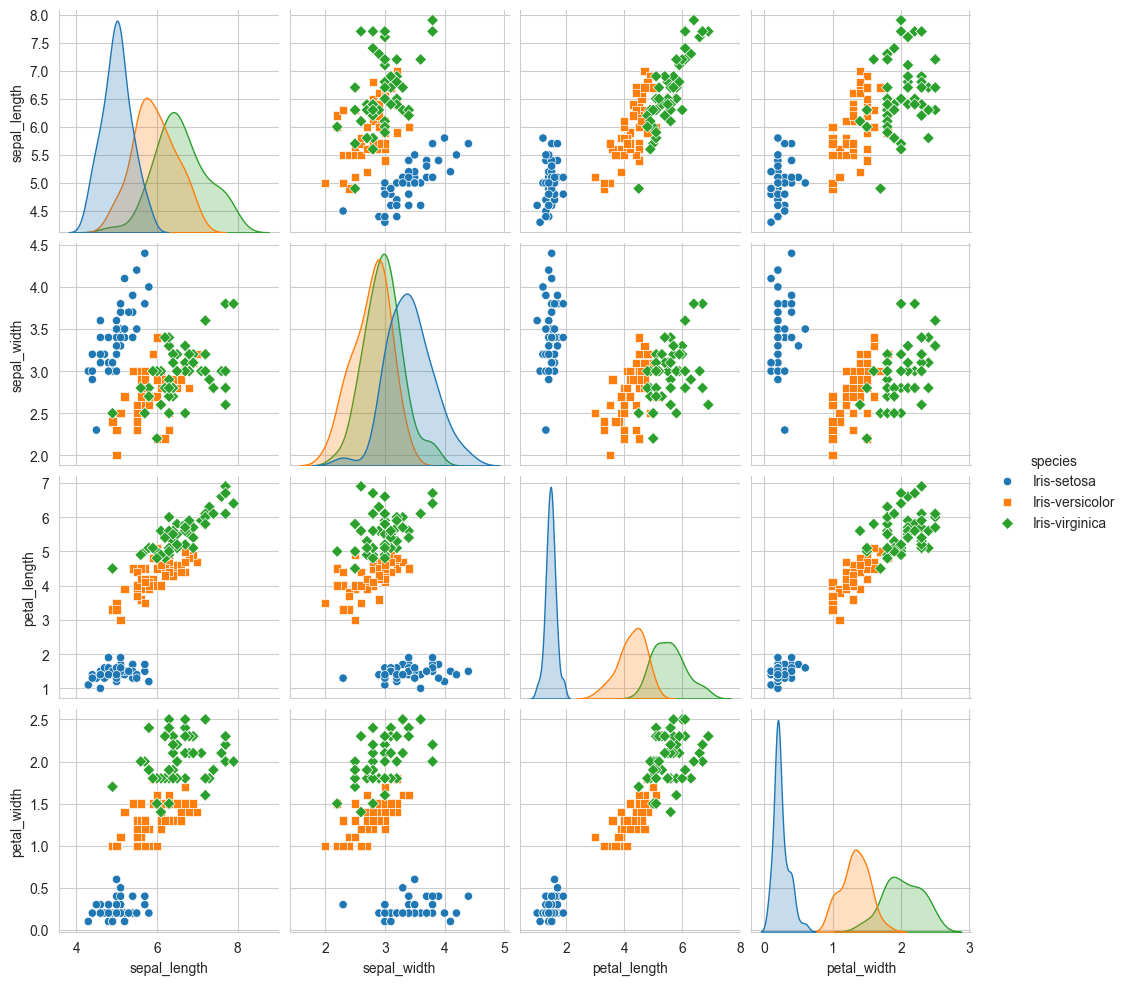

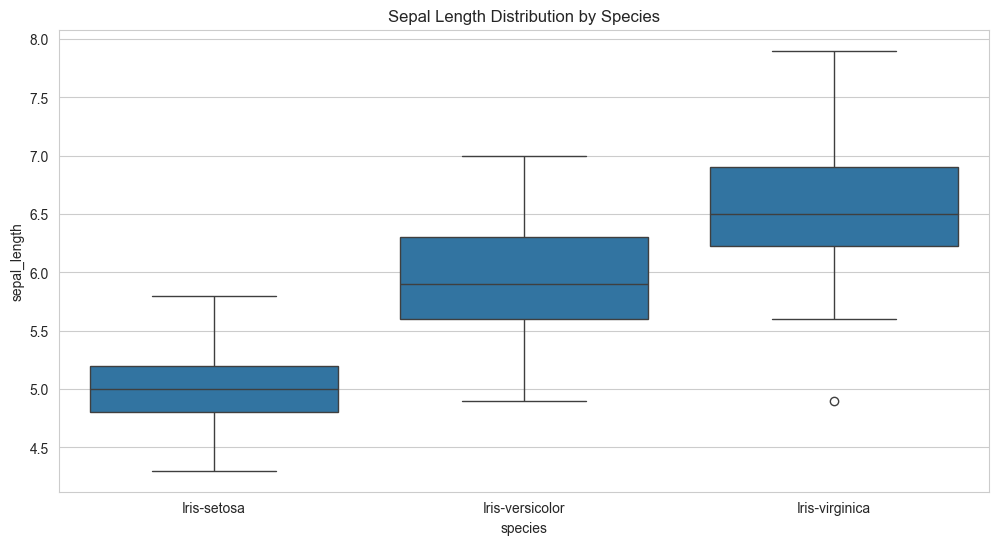

In [3]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Plot the distribution of each feature
df.hist(figsize=(10, 6), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Pairplot to visualize relationships between features and species
sns.pairplot(df, hue="species", markers=["o", "s", "D"])
plt.show()

# Boxplot to compare feature distributions across species
plt.figure(figsize=(12, 6))
sns.boxplot(x="species", y="sepal_length", data=df)
plt.title("Sepal Length Distribution by Species")
plt.show()


## Step 4: Preparing the Data for Model Training


In [4]:
# Encode species labels into numerical values
encoder = LabelEncoder()
df["species"] = encoder.fit_transform(df["species"])  # Convert species to numbers

# Define features (X) and target variable (y)
X = df.drop("species", axis=1)  # All columns except "species"
y = df["species"]  # The target variable (species)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")


Training set size: (120, 4), Testing set size: (30, 4)


## Step 5: Training the Machine Learning Model


In [5]:
# Create and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Display the predicted values
print("Predicted values:", y_pred)


Predicted values: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


## Step 6: Evaluating the Model Performance


Model Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



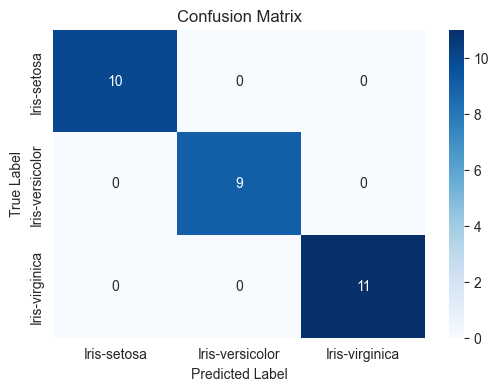

In [6]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


## Step 7: Testing the Model with New Data


In [8]:
# Example of new flower measurements with correct feature names
new_data = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=X.columns)

# Predict the species for the new data
predicted_species = knn_model.predict(new_data)

# Convert the numerical prediction back to the original species name
predicted_species_name = encoder.inverse_transform(predicted_species)

print(f"Predicted species: {predicted_species_name[0]}")


Predicted species: Iris-setosa


## Step 8: Saving the Trained Model


In [9]:
import joblib

# Save the trained model
joblib.dump(knn_model, "iris_knn_model.pkl")

print("Model saved successfully!")


Model saved successfully!
